In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
path_1 =  "/content/gdrive/My Drive/NLP_malawi_train.csv"
path_2 =  "/content/gdrive/My Drive/NLP_malawi_test.csv"

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# read the datafile
train_data = pd.read_csv(path_1)
test_data = pd.read_csv(path_2)

In [ ]:
print(train_data.shape)
print(test_data.shape)

(1436, 3)
(620, 2)


In [ ]:
train_data.head(2)

,ID,Text,Label
0,ID_AASHwXxg,Mwangonde: Khansala wachinyamata Akamati achi...,POLITICS
1,ID_AGoFySzn,MCP siidakhutire ndi kalembera Chipani cha Ma...,POLITICS


In [ ]:
train_data.tail(2)

,ID,Text,Label
1434,ID_ztdsmmva,Tame Mwawa: Phwete ndiye kudya kwake Sewero l...,SOCIAL ISSUES
1435,ID_zteydTpN,PAC iunguza za boma la chifedulo Nthumwi zomw...,POLITICS


In [ ]:
#function to identify percentage of missing data
def missing_statistics(df):    
    statitics = pd.DataFrame(df.isnull().sum()).reset_index()
    statitics.columns=['COLUMN NAME',"MISSING VALUES"]
    statitics['TOTAL ROWS'] = df.shape[0]
    statitics['% MISSING'] = round((statitics['MISSING VALUES']/statitics['TOTAL ROWS'])*100,2)
    return statitics

In [ ]:
missing_statistics(train_data)

,COLUMN NAME,MISSING VALUES,TOTAL ROWS,% MISSING
0,ID,0,1436,0.0
1,Text,0,1436,0.0
2,Label,0,1436,0.0


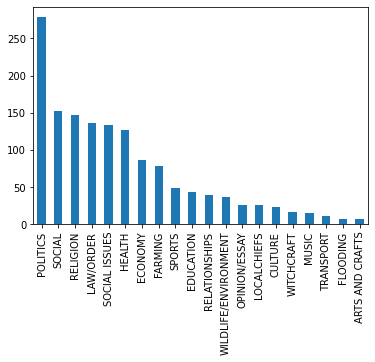

In [ ]:
import matplotlib.pyplot as plt
train_data.Label.value_counts().plot(kind='bar')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
chichewa = ['i', 'ine', 'wanga', 'inenso', 'ife', 'athu', 'athu', 'tokha', 'inu', 'ndinu','iwe ukhoza', 'wako','wekha','nokha','iye','wake','iyemwini','icho','ndi','zake','lokha','iwo','awo','iwowo','chiyani','amene', 'uyu', 'uyo', 'awa', "ndili", 'ndi', 'ali','anali','khalani','akhala','kukhala',' Khalani nawo','wakhala','anali','chitani','amachita','kuchita', 'a', 'an', 'pulogalamu ya', 'ndi', 'koma', 'ngati', 'kapena', 'chifukwa', 'monga', 'mpaka', 'pamene', 'wa', 'pa ',' by','chifukwa' 'ndi','pafupi','kutsutsana','pakati','kupyola','nthawi', 'nthawi','kale','pambuyo','pamwamba', 'pansipa', 'kuti', 'kuchokera', 'mmwamba', 'pansi', 'mu', 'kunja', 'kuyatsa', 'kuchoka', 'kutha', 'kachiwiri', 'kupitilira','kenako',' kamodzi','apa','apo','liti','pati','bwanji','onse','aliyense','onse','aliyense', 'ochepa', 'zambiri', 'ambiri', 'ena', 'otero', 'ayi', 'kapena', 'osati', 'okha', 'eni', 'omwewo', 'kotero',' kuposa','nawonso',' kwambiri','angathe','ndidzatero','basi','musatero', 'musachite',' muyenera', 'muyenera kukhala','tsopano', 'sali', 'sindinathe','​​sanachite','satero','analibe', 'sanatero','sanachite','sindinatero','ayi','si', 'ma', 'sizingatheke','mwina','sayenera', 'osowa','osafunikira', 'shan' , 'nenani', 'sayenera', 'sanali', 'anapambana', 'sangachite', 'sanakonde', 'sangatero']

In [ ]:
#cleaning texts
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
wn = WordNetLemmatizer()
ps = PorterStemmer()

def text_preprocessing(review):
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = review.split()
    review = [wn.lemmatize(word) for word in review if not word in chichewa]
    review = ' '.join(review)
    return review

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
train_data['Text'] = train_data['Text'].apply(text_preprocessing)
test_data['Text'] = test_data['Text'].apply(text_preprocessing)
print(train_data.head())
print(test_data.head())

            ID                                               Text      Label
0  ID_AASHwXxg  mwangonde khansala wachinyamata akamati achiny...   POLITICS
1  ID_AGoFySzn  mcp siidakhutire kalembera chipani cha malawi ...   POLITICS
2  ID_AGrrkBGP  bungwe la manepo lapempha boma liganizire anth...     HEALTH
3  ID_AIJeigeG  ndale zogawanitsa miyambo zanyanya zachilendon...   POLITICS
4  ID_APMprMbV  nanga wapolisi ataphofomoka masiku ano sichikh...  LAW/ORDER
            ID                                               Text
0  ID_ADHEtjTi  abambo odzikhweza akuchuluka kafukufuku apolis...
1  ID_AHfJktdQ  ambuye ziyaye ayamikira aphunzitsi tilitonse a...
2  ID_AUJIHpZr  anatcheleza akundiopseza gogo akundiopseza gog...
3  ID_AUKYBbIM  ulova wafika posauzana adatenga digiri ya uphu...
4  ID_AZnsVPEi  dzombe kukoma kuyambira makedzana panthawi ya ...


In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(train_data['Text']).toarray()
training = pd.DataFrame(X, columns=vectorizer.get_feature_names())
print(training.shape)

X_test = vectorizer.transform(test_data['Text']).toarray()
test_new = pd.DataFrame(X_test, columns=vectorizer.get_feature_names())
print(test_new.shape)

(1436, 49480)
(620, 49480)


In [ ]:
training.head() #check first five rows

,aaa,aaaa,aaaaargh,aaah,aadati,aah,aakazi,aakazinso,aakulu,aakuluakulu,aakulundikunenatu,aakuluwo,aamfunsa,aamuna,aana,aanafika,aangono,aantero,aanthu,aanzathu,aapa,aapolisi,aaron,aatali,aatsikana,ab,aba,ababa,abaco,abadwa,abadwe,abagwirizira,abakha,abala,abalalike,abale,abalewa,abambo,abambonso,abambowa,...,zoyipa,zoyitseka,zozamitsa,zozemba,zozembetsa,zozenga,zozilamulira,zozimira,zozindikiritsa,zozira,zozitetedzera,zozitetezera,zozitetezerazi,zoziyamba,zozizira,zoziziritsa,zozizwitsa,zozizwitsazo,zozungulira,zozuza,ztb,zudagwa,zulani,zulo,zulu,zumaire,zunga,zungguzungguguzungguzeng,zungulizunguli,zusamvana,zutatu,zuwele,zuza,zuze,zuziwe,zvakanedza,zwelethini,zwelithini,zyoli,zzidamangidwa
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.037547,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X = training
y = train_data['Label']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
sgd = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)
sgd.fit(X_train, y_train)         
sgd.score(X_train, y_train)

0.9860696517412936

In [ ]:
sgd_pred = sgd.predict(X_test)
sgd.score(X_test, y_test)

0.605568445475638

In [ ]:
pred_sgd = sgd.predict(test_new)

In [ ]:
train_data['Label'].value_counts()

POLITICS                279
SOCIAL                  152
RELIGION                147
LAW/ORDER               136
SOCIAL ISSUES           134
HEALTH                  127
ECONOMY                  86
FARMING                  78
SPORTS                   49
EDUCATION                43
RELATIONSHIPS            39
WILDLIFE/ENVIRONMENT     36
OPINION/ESSAY            26
LOCALCHIEFS              25
CULTURE                  23
WITCHCRAFT               16
MUSIC                    15
TRANSPORT                11
ARTS AND CRAFTS           7
FLOODING                  7
Name: Label, dtype: int64

In [ ]:
tags = ['POLITICS','SOCIAL','RELIGION', 'LAW/ORDER','SOCIAL ISSUES', 'HEALTH', 'ECONOMY', 'FARMING', 'SPORTS', 'EDUCATION', 'RELATIONSHIPS', 'WILDLIFE/ENVIRONMENT', 'OPINION/ESSAY', 'LOCALCHIEFS', 'CULTURE', 'WITCHCRAFT',                 
        'MUSIC','TRANSPORT', 'ARTS AND CRAFTS', 'FLOODING']     

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(y_test, sgd_pred,target_names=tags))

                      precision    recall  f1-score   support

            POLITICS       0.00      0.00      0.00         3
              SOCIAL       0.00      0.00      0.00         7
            RELIGION       0.46      0.24      0.32        25
           LAW/ORDER       0.83      0.91      0.87        11
       SOCIAL ISSUES       0.88      0.92      0.90        24
              HEALTH       0.00      0.00      0.00         3
             ECONOMY       0.77      0.62      0.69        37
             FARMING       0.62      0.69      0.65        49
              SPORTS       0.33      0.67      0.44         3
           EDUCATION       1.00      0.40      0.57         5
       RELATIONSHIPS       0.00      0.00      0.00         3
WILDLIFE/ENVIRONMENT       0.54      0.93      0.69        76
       OPINION/ESSAY       1.00      0.92      0.96        12
         LOCALCHIEFS       0.50      0.56      0.53        39
             CULTURE       0.56      0.19      0.28        54
       

In [ ]:
# Preparing submission
submission = pd.DataFrame()
submission['ID'] = test_data['ID']
submission['Label'] = pred_sgd
submission.to_csv('gdrive/My Drive/submission4.csv', index=False) #write to csv and save file as comparison